## Метрики качества классификации

In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def write_answer(filename, answer):
    
    with open(filename, 'w') as fout:
        
        fout.write(str(answer))
        fout.close()

### Введение

В задачах классификации может быть много особенностей, влияющих на подсчет качества: различные цены ошибок, несбалансированность классов и т.д. Из-за этого существует большое количество метрик качества — каждая из них рассчитана на определенное сочетание свойств задачи и требований к ее решению.

Меры качества классификации можно разбить на две большие группы: предназначенные для алгоритмов, выдающих номера классов, и для алгоритмов, выдающих оценки принадлежности к классам. К первой группе относятся доля правильных ответов, точность, полнота, F-мера. Ко второй — площади под ROC- или PR-кривой.

### Реализация в sklearn

Различные метрики качества реализованы в пакете <code>sklearn.metrics</code>. Конкретные функции указаны в инструкции по выполнению задания.

### Материалы

- [Подробнее о метриках качества](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture04-linclass.pdf)
- [Задачи по AUC-ROC](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/seminars/sem05-linclass.pdf)

#### 1. Загрузите файл classification.csv. В нем записаны истинные классы объектов выборки (колонка true) и ответы некоторого классификатора (колонка pred).

In [3]:
classification = pd.read_csv('classification.csv', header=0)
classification.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


#### 2. Заполните таблицу ошибок классификации:

||Actual Positive|Actual Negative|
|:--------:|:-------:|:---------------:|
|Predicted Positive|TP|FP|
|Predicted Negative	|FN|TN|

Для этого подсчитайте величины TP, FP, FN и TN согласно их определениям. Например, FP — это количество объектов, имеющих класс 0, но отнесенных алгоритмом к классу 1. Ответ в данном вопросе — четыре числа через пробел.

<AxesSubplot:>

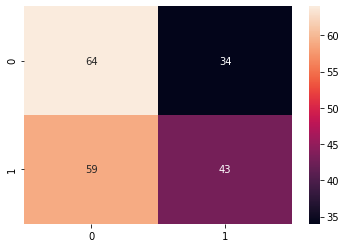

In [4]:
tn, fp, fn, tp = confusion_matrix(classification['true'], classification['pred']).ravel()
conf_matrix = confusion_matrix(classification['true'], classification['pred'])
sns.heatmap(conf_matrix, annot=True)

In [5]:
tn, fp, fn, tp

(64, 34, 59, 43)

In [6]:
write_answer('submission_metrics_1.txt', f'{tp} {fp} {fn} {tn}')

#### 3. Посчитайте основные метрики качества классификатора:

- Accuracy (доля верно угаданных) — <code>sklearn.metrics.accuracy_score</code>
- Precision (точность) — <code>sklearn.metrics.precision_score</code>
- Recall (полнота) — <code>sklearn.metrics.recall_score</code>
- F-мера — <code>sklearn.metrics.f1_score</code>

В качестве ответа укажите эти четыре числа через пробел.

In [7]:
accuracy = accuracy_score(classification['true'], classification['pred'])
precision = precision_score(classification['true'], classification['pred'])
recall = recall_score(classification['true'], classification['pred'])
f1 = f1_score(classification['true'], classification['pred'])

print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}')

write_answer('submission_metrics_2.txt', f'{accuracy} {precision} {recall} {f1}')

Accuracy: 0.54, Precision: 0.56, Recall: 0.42, F1-score: 0.48


#### 4. Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке:

- для логистической регрессии — вероятность положительного класса (колонка score_logreg),
- для SVM — отступ от разделяющей поверхности (колонка score_svm),
- для метрического алгоритма — взвешенная сумма классов соседей (колонка score_knn),
- для решающего дерева — доля положительных объектов в листе (колонка score_tree).

Загрузите этот файл.

In [8]:
scores = pd.read_csv('scores.csv')
scores.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


#### 5. Посчитайте площадь под ROC-кривой для каждого классификатора. 

Какой классификатор имеет наибольшее значение метрики AUC-ROC (укажите название столбца)? Воспользуйтесь функцией <code>sklearn.metrics.roc_auc_score</code>.

In [9]:
logreg = roc_auc_score(scores['true'], scores['score_logreg'])
svm = roc_auc_score(scores['true'], scores['score_svm'])
knn = roc_auc_score(scores['true'], scores['score_knn'])
tree = roc_auc_score(scores['true'], scores['score_tree'])

print(f'ROC-AUCs - LogReg: {logreg:.3f}, SVM: {svm:.3f}, kNN: {knn:.3f}, Dec Tree: {tree:.3f}')

write_answer('submission_metrics_3.txt', 'score_logreg')

ROC-AUCs - LogReg: 0.719, SVM: 0.709, kNN: 0.635, Dec Tree: 0.692


Логистическая регрессия имеет самый высокий показатель AUC-ROC

#### 6. Какой классификатор достигает наибольшей точности (Precision) при полноте (Recall) не менее 70% ? 

Чтобы получить ответ на этот вопрос, найдите все точки precision-recall-кривой с помощью функции <code>sklearn.metrics.precision_recall_curve</code>. Она возвращает три массива: precision, recall, thresholds. В них записаны точность и полнота при определенных порогах, указанных в массиве thresholds. Найдите максимальной значение точности среди тех записей, для которых полнота не меньше, чем 0.7.

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. При необходимости округляйте дробную часть до двух знаков.

In [10]:
lr_pr, lr_rec, lr_thr = precision_recall_curve(scores['true'], scores['score_logreg'])
svm_pr, svm_rec, svm_thr = precision_recall_curve(scores['true'], scores['score_svm'])
knn_pr, knn_rec, knn_thr = precision_recall_curve(scores['true'], scores['score_knn'])
tree_pr, tree_rec, tree_thr = precision_recall_curve(scores['true'], scores['score_tree'])

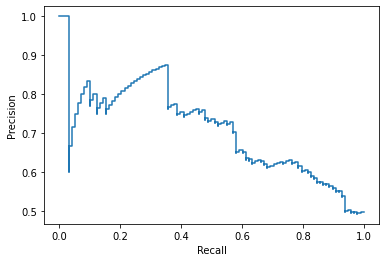

In [11]:
lr_pr_curve = PrecisionRecallDisplay(precision=lr_pr, recall=lr_rec).plot()

In [12]:
lr_max_prec = list(
    filter(lambda x: x[1] >= 0.7, list(zip(lr_pr, lr_rec))))[-1][0]
svm_max_prec = list(
    filter(lambda x: x[1] >= 0.7, list(zip(svm_pr, svm_rec))))[-1][0]
knn_max_prec = list(
    filter(lambda x: x[1] >= 0.7, list(zip(knn_pr, knn_rec))))[-1][0]
tree_max_prec = list(
    filter(lambda x: x[1] >= 0.7, list(zip(tree_pr, tree_rec))))[-1][0]

print(f'Clf precision scores:- LogReg: {lr_max_prec:.2f}, SVM: {svm_max_prec:.2f}, kNN: {knn_max_prec:.2f}, DecTree: {tree_max_prec:.2f}')

Clf precision scores:- LogReg: 0.62, SVM: 0.62, kNN: 0.59, DecTree: 0.65


In [13]:
write_answer('submission_metrics_4.txt', 'score_tree')

Наилучшую точность при таком ограничении показывает решающее дерево: precision = 0.65